In [1]:
from core.game import Game
from core.game_config import GameConfig
from core.player import Player
from core.noise_player import NoisePlayer
from analysis.population_spec import make_hetero_population_spec, PopulationFamilyConfig, build_population_variant
from typing import Optional, Dict, Any, List, Iterable
from dataclasses import dataclass, field
#from core.m_maker import MarketMaker
import numpy as np
import matplotlib.pyplot as plt
#from payoffs.mg import BinaryMGPayoff, ScaledMGPayoff, DollarGamePayoff
import json
import pandas as pd

In [24]:
population_spec = {'total': 801, 'cohorts': [{'count': 301, 'memory': 10, 'payoff': 'ScaledMG', 'strategies': 2, 'position_limit': 0, 'agent_type': 'strategic'}, {'count': 500, 'memory': 1, 'payoff': -1, 'strategies': 0, 'position_limit': 10, 'agent_type': 'noise',  'allow_no_action': False,}]}
game_cfg = GameConfig(
    rounds=1000,
    lambda_=0.002,
    mm=None,        # could be extended for a new market maker class in the future.  Now just None or True
    price = 100,
    seed=123,
)

In [25]:
game=Game(population_spec, game_cfg, PlayerClass=Player)
game.run()

{'Attendance': array([-25, -15, -13,  -9, -37, -19, -11,   1, -29,   3,  32,  31,  -4,
         13,   1,  43, -44,  -6,  27,  21, -18,  72,   9, -15, -42, -37,
         -9, -10,  14,  -3,   8,  26, -28,  35, -11, -75, -42,   2, -62,
        -56,  36,  36,  26,  16, -18, -42, -50,  13,  37, -20,  15,   9,
        -10,  -9,  14,  -2, -11,  14,  30,  -6, -41,   8, -51,   9,  23,
          4, -42, -25, -39,  31,  12,  21,   6,   4,  -2,  61,  13, -51,
        -19,   6, -14, -25, -43,  22,  -4,  23, -24,  16,   2, -13, -14,
         46,  -6, -10,  -7,  22,  23,   4,  43, -20,  32,  16,  26,   6,
        -52, -13, -21, -24, -41,   4,  27, -36,  32,  45, -18,   8, -50,
        -31,   7, -49,  21,  32,  39,  13,  -4,  19, -10,  66,  26,   8,
         -8, -37,  40,  -8, -33,   3,  40, -28,  51, -15, -42, -17,   6,
        -12, -17, -35, -25,  11,  49, -12,  25,   1,  -9, -30, -29,  53,
         -8,  21,  19, -28,  17,  -3, -61,  -1,  11,   8, -32, -24, -11,
         42,  14, -48,  17,  -1, -22,

In [45]:
df = pd.DataFrame({"wealth": game.results["Attendance"], "cohort_id": game.results["cohort_ids"]})

ValueError: All arrays must be of the same length

In [46]:
df.groupby("cohort_id")["wealth"].describe()

,count,mean,std,min,25%,50%,75%,max
cohort_id,,,,,,,,
0,301.0,-36.378217,2107.598603,-5463.613682,-1432.510789,-63.460935,1523.278264,5501.927372
1,500.0,-63.832133,434.566986,-1359.789904,-348.444561,-64.407487,226.656450,1058.328999


In [15]:
@dataclass
class CohortConfig:
    memory: int
    strategies: int
    payoff: str
    count: int
    position_limit: int = 0

@dataclass
class SuccessBoxplotCohortConfig:
    """
    Dataclass for plotting success by cohort for heterogeneous memory or strategies
    allowing JSON file input of experiment configuration.
    """
    payoffs: Iterable[str]|str
    num_players_per_cohort: int
    m_values: Iterable[int]|int
    s_values: Iterable[int]|int
    position_limit: int = 0
    rounds: int = 1_000
    market_maker: bool | None = None
    price: float = 100
    record_agent_series: bool = True
    save_dir: str = "plots/success"
    mode: str = "cartesian"   #or "zip"
    cohorts: List[CohortConfig] = field(default_factory=list)
    seed: str = 1234

In [16]:
cfg_game = {"payoffs": "BinaryMG",
           "num_players_per_cohort": [175],
           "m_values": 8,
           "s_values": [2, 4, 6, 8, 10, 12, 14, 16],
           "position_limit": 0,
           "rounds": 5_000,
           "market_maker": None,
           "price": 100, 
           "save_dir": "plots/success",
           "mode": "cartesian",   #or "zip"
           "cohorts": [],
           "seed": 1234
           }
    
cfg = SuccessBoxplotCohortConfig(**cfg_game)

In [17]:
pd.Series(cfg.num_players_per_cohort).unique()

array([175])

In [23]:
Family={
  "rounds": 5000,
  "price": 100.0,
  "lambda_": 0.0000667,
  "market_maker": None,
  "record_agent_series": False,
  "seed": 1234,

  "base_cohorts": [
    {
      "memory": 7,
      "strategies": 2,
      "payoff": "ScaledMG",
      "count": 250,
      "position_limit": 0,
      "type": "strategic"  
    },
    {
      "memory": 1,
      "payoff": "DollarGame",
      "count": 250,
      "position_limit": 0
      "type": "noise"
    }
  ],
}


In [24]:
Family=PopulationFamilyConfig(**Family)

In [35]:
populations = [build_population_variant(Family, v) for v in Family.values]
populations

[{'total': 500,
  'cohorts': [{'memory': 5,
    'strategies': 4,
    'payoff': 'DollarGame',
    'count': 0,
    'position_limit': 0},
   {'memory': 7,
    'strategies': 2,
    'payoff': 'ScaledMG',
    'count': 500,
    'position_limit': 0}]},
 {'total': 500,
  'cohorts': [{'memory': 5,
    'strategies': 4,
    'payoff': 'DollarGame',
    'count': 125,
    'position_limit': 0},
   {'memory': 7,
    'strategies': 2,
    'payoff': 'ScaledMG',
    'count': 375,
    'position_limit': 0}]},
 {'total': 500,
  'cohorts': [{'memory': 5,
    'strategies': 4,
    'payoff': 'DollarGame',
    'count': 250,
    'position_limit': 0},
   {'memory': 7,
    'strategies': 2,
    'payoff': 'ScaledMG',
    'count': 250,
    'position_limit': 0}]},
 {'total': 500,
  'cohorts': [{'memory': 5,
    'strategies': 4,
    'payoff': 'DollarGame',
    'count': 375,
    'position_limit': 0},
   {'memory': 7,
    'strategies': 2,
    'payoff': 'ScaledMG',
    'count': 125,
    'position_limit': 0}]},
 {'total': 500

In [38]:
[p['cohorts'] for p in populations]

[[{'memory': 5,
   'strategies': 4,
   'payoff': 'DollarGame',
   'count': 0,
   'position_limit': 0},
  {'memory': 7,
   'strategies': 2,
   'payoff': 'ScaledMG',
   'count': 500,
   'position_limit': 0}],
 [{'memory': 5,
   'strategies': 4,
   'payoff': 'DollarGame',
   'count': 125,
   'position_limit': 0},
  {'memory': 7,
   'strategies': 2,
   'payoff': 'ScaledMG',
   'count': 375,
   'position_limit': 0}],
 [{'memory': 5,
   'strategies': 4,
   'payoff': 'DollarGame',
   'count': 250,
   'position_limit': 0},
  {'memory': 7,
   'strategies': 2,
   'payoff': 'ScaledMG',
   'count': 250,
   'position_limit': 0}],
 [{'memory': 5,
   'strategies': 4,
   'payoff': 'DollarGame',
   'count': 375,
   'position_limit': 0},
  {'memory': 7,
   'strategies': 2,
   'payoff': 'ScaledMG',
   'count': 125,
   'position_limit': 0}],
 [{'memory': 5,
   'strategies': 4,
   'payoff': 'DollarGame',
   'count': 500,
   'position_limit': 0},
  {'memory': 7,
   'strategies': 2,
   'payoff': 'ScaledMG',


TODO: check whether or not price series from game and player series match the results output


In [5]:
spec = {
    "total": 301,
    "cohorts": [
        {"count": 0.7, "memory": 5, "payoff": "BinaryMG", "strategies": 2, "position_limit": 0},
        {"count": 0.3, "memory": 3, "payoff": "BinaryMG", "strategies": 2, "position_limit": 0},
    ]
}

cfg = GameConfig(
    rounds=1000,
    lambda_=0.002,
    mm=None,        # could be extended for a new market maker class in the future.  Now just None or True
    price = 100,
    seed=123,
)

game=Game(spec, cfg, Player)

In [6]:
 cfg_game = {"payoffs": "BinaryMG",
           "num_players_per_cohort": 175,
           "m_values": 8,
           "s_values": [2, 4, 6, 8, 10, 12, 14, 16],
           "position_limit": 0,
           "rounds": 5_000,
           "market_maker": None,
           "price": 100, 
           "save_dir": "plots/success",
           "mode": "cartesian",   #or "zip"
           "cohorts": [],
           "seed": 1234
           }

In [7]:
payoffs = "BinaryMG"   # registry key
m_values = list(range(3, 17))
s_values = [5]
N_per_m = 175
rounds = 5000
seed = 12345

population_spec = make_hetero_population_spec(
    m_values=m_values,
    num_players_per_cohort=N_per_m,
    payoffs=payoffs,
    s_values=s_values,
    position_limit=0
)

In [50]:
metric_specs = {
    "Attendance": {
        "extract": lambda res: res["Attendance"],
        "extract2": None,
        "plot_fn": "fn",          # your callback
        "y_label": "Attendance A_t",
        "x_label": "Round",
        "stat_sum": True,
        "stub": "attendance",
    },
    "price_series": {
        "extract": lambda res: res["price_series"],
        "extract2": None,
        "plot_fn": "fn",
        "y_label": "Price",
        "x_label": "Time/Round",
        "stat_sum": True,
        "stub": "price",
    },
    "Attendance_distribution": {
        "extract": lambda res: res["Attendance"],
        "extract2": None,
        "plot_fn": "fn",          # your callback
        "y_label": "Frequency",
        "x_label": "Attendance",
        "stat_sum": False,
        "stub": "attendance_hist",
    },
    "succes_rates": {
        "extract": lambda res: res["final_wins"]/game_cfg.rounds,
        "extract2": None,
        "plot_fn": "fn",
        "y_label": "Frequency",
        "x_label": "Success Rate",
        "stat_sum": False,
        "stub": "success_hist",
    },
    "points": {
        "extract": lambda res: res["final_points"],
        "extract2": None,
        "plot_fn": "fn",
        "y_label": "Frequency",
        "x_label": "Points",
        "stat_sum": False,
        "stub": "points",
    },
    "wealth_wins":{
        "extract": lambda res: res["final_wealth"],
        "extract2": lambda res: res["final_wins"]/game_cfg.rounds,
        "plot_fn": "fn",
        "x_label": "Wealth",
        "y_label": "Win Frequency",
        "stat_sum": False,
        "stub": "wealth_v_wins",
    },
    "wealth_switches":{
        "extract": lambda res: res["final_wealth"],
        "extract2": lambda res: res["strategy_switches"],
        "plot_fn": "fn",
        "y_label": "Num strat switches",
        "x_label": "Wealth",
        "stat_sum": False,
        "stub": "wealth_v_switches",
    },
    "returns_autocorr":{
        "extract": lambda res: returns_from_prices(res["price_series"])[1:],
        "extract2": lambda res: returns_from_prices(res["price_series"])[:-1],
        "plot_fn": "fn",
        "y_label": "r(t+1)",
        "x_label": "r(t)",
        "stat_sum": False,
        "stub": "returns_autocorr",
    },
    "risk_return":{
        "extract": lambda res: [risk_from_wealth(w)[0] for w in res["wealth"].T],
        "extract2": lambda res: [risk_from_wealth(w)[1] for w in res["wealth"].T],
        "plot_fn": "fn",
        "y_label": "return",
        "x_label": "risk",
        "stat_sum": False,
        "stub": "risk_return",
        }
    # add more metrics here later
}

In [52]:
for idx, item in metric_specs.items():
    print(idx, item)

Attendance {'extract': <function <lambda> at 0x155cb94e0>, 'extract2': None, 'plot_fn': 'fn', 'y_label': 'Attendance A_t', 'x_label': 'Round', 'stat_sum': True, 'stub': 'attendance'}
price_series {'extract': <function <lambda> at 0x155cb8540>, 'extract2': None, 'plot_fn': 'fn', 'y_label': 'Price', 'x_label': 'Time/Round', 'stat_sum': True, 'stub': 'price'}
Attendance_distribution {'extract': <function <lambda> at 0x155cb9800>, 'extract2': None, 'plot_fn': 'fn', 'y_label': 'Frequency', 'x_label': 'Attendance', 'stat_sum': False, 'stub': 'attendance_hist'}
succes_rates {'extract': <function <lambda> at 0x155cb9760>, 'extract2': None, 'plot_fn': 'fn', 'y_label': 'Frequency', 'x_label': 'Success Rate', 'stat_sum': False, 'stub': 'success_hist'}
points {'extract': <function <lambda> at 0x155cb96c0>, 'extract2': None, 'plot_fn': 'fn', 'y_label': 'Frequency', 'x_label': 'Points', 'stat_sum': False, 'stub': 'points'}
wealth_wins {'extract': <function <lambda> at 0x155cb99e0>, 'extract2': <func

In [9]:
game=Game(population_spec, cfg, Player)
out = game.run()

In [10]:
out

{'A_series': array([-19,  25,  15,  21,   3, -17,   3,  11,  -3,  -9,   5,  -1,  17,
        -13, -13,  -9, -29,   3,   3, -13,  13,   5,   9,   5,  11, -13,
        -37,  11,  13,  -9, -13,  -7,  21, -11,  -5,   7,  11,  -1,   5,
        -11,   1,  -1,  19,   9,  25, -15,  -3,  -3,  -3, -25,  -3,  33,
        -25,  25,  23,  15,  19,  -9,   7,  -7, -25,  31, -33, -43,   3,
         -3,  -5, -19,   9,  -3,  15, -21,  13,  -9, -11,   1,  15,  23,
         -1,  -5, -25, -19,  13,   3,  25, -21,  11,   3,  11,  21,  11,
         25, -25,   7, -15,  11,  33, -35, -25,   1, -13, -29, -11,  -9,
        -25,  -3,  43,  17, -15,  23,   5, -17, -13, -17,  29,   3,  17,
         -3,  11, -19,   3,  19,  17,   3, -13, -19,   9,  19,  13,  13,
         27, -19, -21, -19,  29,  -5, -13,   7,  15,   5, -21, -19,  15,
        -25,  15,   3, -37,  11,  11, -15, -17,   3,   7,   9,   7,   5,
         15,  -7,  17, -33, -19,   5,  -7,  -7, -39,  -9, -21,  -3,   9,
          5,  -5,   1,  -9,  15, -15,  

In [11]:
cohort_ids = out["cohort_ids"]
success_rate = out["final_wins"]/cfg.rounds

In [12]:
cohort_ids

array([ 1, 11,  0, 13, 11,  2,  3,  9,  3,  6, 11,  7,  0,  0,  3, 12, 11,
       11,  7,  6,  3,  8, 13,  5,  4,  8, 13, 10,  6,  6,  2,  3,  6,  9,
        0,  6,  9,  2,  2,  8,  8, 10,  5,  9,  9, 13,  2,  8,  7,  3,  5,
        0,  3, 11, 10,  4,  4, 12, 11, 13,  6,  9,  9, 12,  0,  0,  7,  2,
       13, 10, 11, 13,  8,  1,  6, 10,  7,  0, 12,  6,  7,  0,  8,  7,  0,
       12,  4, 12,  0, 10,  3,  4,  9, 13,  5,  4,  8,  9,  1,  2,  4, 11,
        1, 10,  0, 13,  5,  9, 10,  8,  5,  2,  4,  5,  0,  2,  0,  3,  1,
       13,  1,  8,  0,  7, 10,  9,  1, 11,  7,  0,  6,  7,  4,  1,  1, 12,
        1, 13,  7, 10, 12, 12,  5,  5,  7,  4,  6,  4, 12,  2, 13, 10, 12,
        1,  1,  4,  8,  3,  5,  0, 10,  2,  3,  6,  0,  8,  9, 11,  5,  5,
        0,  3, 11,  2, 12])

In [21]:
success_rate

array([0.458, 0.483, 0.435, 0.471, 0.472, 0.47 , 0.446, 0.458, 0.478,
       0.465, 0.472, 0.486, 0.475, 0.455, 0.441, 0.489, 0.434, 0.476,
       0.464, 0.466, 0.471, 0.446, 0.452, 0.438, 0.461, 0.464, 0.457,
       0.446, 0.457, 0.435, 0.465, 0.5  , 0.476, 0.45 , 0.464, 0.448,
       0.449, 0.461, 0.455, 0.454, 0.472, 0.505, 0.489, 0.492, 0.463,
       0.47 , 0.454, 0.458, 0.485, 0.456, 0.463, 0.49 , 0.478, 0.483,
       0.46 , 0.482, 0.454, 0.425, 0.479, 0.475, 0.479, 0.467, 0.482,
       0.476, 0.483, 0.45 , 0.466, 0.434, 0.468, 0.468, 0.464, 0.493,
       0.471, 0.446, 0.442, 0.49 , 0.462, 0.464, 0.473, 0.484, 0.475,
       0.455, 0.471, 0.478, 0.49 , 0.469, 0.503, 0.467, 0.475, 0.475,
       0.423, 0.476, 0.467, 0.486, 0.488, 0.481, 0.477, 0.481, 0.459,
       0.491, 0.422, 0.502, 0.422, 0.451, 0.483, 0.429, 0.475, 0.469,
       0.481, 0.451, 0.46 , 0.441, 0.485, 0.459, 0.441, 0.453, 0.469,
       0.471, 0.487, 0.487, 0.465, 0.473, 0.481, 0.468, 0.497, 0.457,
       0.455, 0.454,

In [9]:
def group_timeseries_mean_by_cohort(X, cohort_ids):
    X = np.asarray(X)
    cohort_ids = np.asarray(cohort_ids)
    out = {}
    for cid in np.unique(cohort_ids):
        mask = cohort_ids == cid
        out[int(cid)] = X[mask].mean(axis=0)
    return out

In [13]:
cid = 0
mask = cohort_ids == cid
new = success_rate[mask]

new

array([0.0916, 0.0966, 0.0942, 0.0944, 0.094 , 0.093 , 0.0944, 0.0972,
       0.095 , 0.091 , 0.0978, 0.0952, 0.0928, 0.0932, 0.0942, 0.0904,
       0.0914, 0.0892, 0.0914, 0.093 , 0.1   , 0.0952, 0.0896, 0.0922,
       0.0944, 0.101 , 0.0978, 0.0984, 0.0926, 0.094 , 0.0908, 0.0916,
       0.097 , 0.0912, 0.0926, 0.098 , 0.0956, 0.0966, 0.0964, 0.095 ,
       0.0958, 0.0964, 0.0952, 0.0966, 0.0932, 0.0936, 0.0936, 0.0986,
       0.0942, 0.098 , 0.0928, 0.0946, 0.0968, 0.091 , 0.0942, 0.0956,
       0.098 , 0.0938, 0.1006, 0.0934, 0.095 , 0.095 , 0.0934, 0.0972,
       0.0976, 0.0962, 0.0954, 0.0962, 0.0918, 0.0982, 0.1004, 0.0902,
       0.0966, 0.095 , 0.0962, 0.092 , 0.097 , 0.0906, 0.0938, 0.0942,
       0.0974, 0.0974, 0.093 , 0.0946, 0.0962, 0.0936, 0.0994, 0.0914,
       0.091 , 0.0942, 0.0946, 0.0936, 0.098 , 0.0952, 0.0928, 0.0972,
       0.0948, 0.0894, 0.0962, 0.094 , 0.0948, 0.0936, 0.1004, 0.0908,
       0.0926, 0.0944, 0.1   , 0.0952, 0.097 , 0.0952, 0.0948, 0.0946,
      

In [11]:
from dataclasses import dataclass

@dataclass(frozen=True)
class Cohort:
    count: int
    memory: int
    payoff: str
    strategies: int
    position_limit: int = None
    
def _normalize_cohorts(spec):
        total = spec.get("total")
        parts = spec["cohorts"]
        absol = sum(p["count"] for p in parts if isinstance(p["count"], int))
        props = [p for p in parts if isinstance(p["count"], float)]
        if props and total is None:
            raise ValueError("Proportional counts require 'total'.")
        remaining = 0 if total is None else total - absol
        if total is not None and remaining < 0:
            raise ValueError("Absolute cohort counts exceed total.")
        out = [Cohort(p["count"], p["memory"], p["payoff"], p["strategies"], p["position_limit"])
               for p in parts if isinstance(p["count"], int) and p["count"]>0]
        if props:
            w = np.array([p["count"] for p in props], float); w /= w.sum()
            raw = w * remaining
            base = np.floor(raw).astype(int)
            leftover = remaining - base.sum()
            order = np.argsort(-(raw - base))
            base[order[:leftover]] += 1
            out += [Cohort(int(c), p["memory"], p["payoff"], p["strategies"], p["position_limit"])
                    for p, c in zip(props, base) if c>0]
        return out

def _cohorts_from_spec(spec):
        if "cohorts" in spec: return _normalize_cohorts(spec)
        if "grid" in spec:    return self._cohorts_from_grid(spec)
        if "sample" in spec:  return self._cohorts_from_sample(spec)
        raise ValueError("Provide one of: 'cohorts', 'grid', or 'sample'.")

cohorts = _cohorts_from_spec(spec)
cohorts

[Cohort(count=140, memory=2, payoff='BinaryMGPayoff', strategies=2, position_limit=2),
 Cohort(count=60, memory=5, payoff='BinaryMGPayoff', strategies=3, position_limit=2)]

In [10]:
game.run()

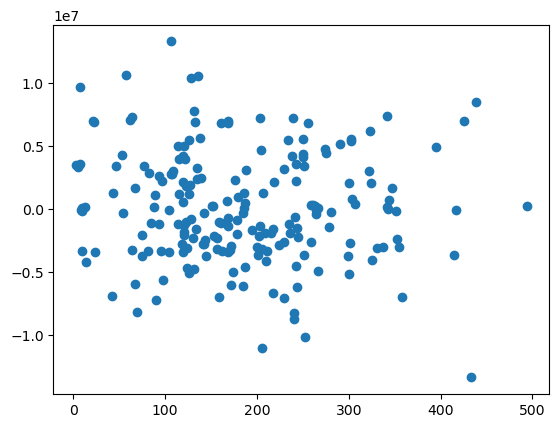

In [11]:
plt.scatter([p.strategy_switches for p in game.players], [p.wealth for p in game.players])

In [12]:
ac1 = float(np.corrcoef([p.strategy_switches for p in game.players], [p.wealth for p in game.players])[0, 1])
ac1


-0.07772282187404211

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  1., 37.]),
 array([-2.36947737e+16, -2.25100350e+16, -2.13252963e+16, -2.01405576e+16,
        -1.89558190e+16, -1.77710803e+16, -1.65863416e+16, -1.54016029e+16,
        -1.42168642e+16, -1.30321255e+16, -1.18473869e+16, -1.06626482e+16,
        -9.47790948e+15, -8.29317080e+15, -7.10843211e+15, -5.92369343e+15,
        -4.73895474e+15, -3.55421606e+15, -2.36947737e+15, -1.18473869e+15,
        -4.81449286e+03]),
 <BarContainer object of 20 artists>)

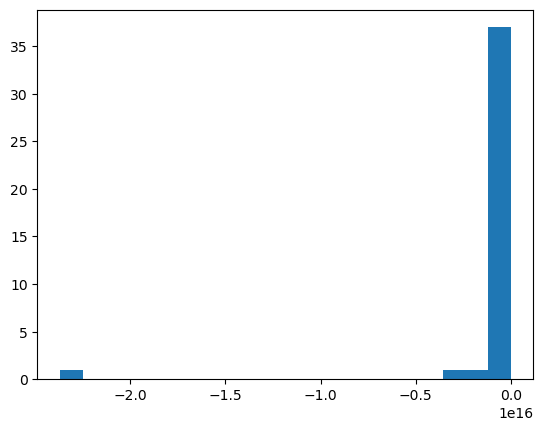

In [15]:
mm_wealth=[]
for n in range(40):
    game.run()
    mm_wealth.append(game.mm.wealth)
plt.hist(mm_wealth, bins=20)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  1., 37.]),
 array([-2.36947737e+16, -2.29049479e+16, -2.21151221e+16, -2.13252963e+16,
        -2.05354705e+16, -1.97456448e+16, -1.89558190e+16, -1.81659932e+16,
        -1.73761674e+16, -1.65863416e+16, -1.57965158e+16, -1.50066900e+16,
        -1.42168642e+16, -1.34270384e+16, -1.26372126e+16, -1.18473869e+16,
        -1.10575611e+16, -1.02677353e+16, -9.47790948e+15, -8.68808369e+15,
        -7.89825790e+15, -7.10843211e+15, -6.31860632e+15, -5.52878053e+15,
        -4.73895474e+15, -3.94912895e+15, -3.15930316e+15, -2.36947737e+15,
        -1.57965158e+15, -7.89825790e+14, -4.81449286e+03]),
 <BarContainer object of 30 artists>)

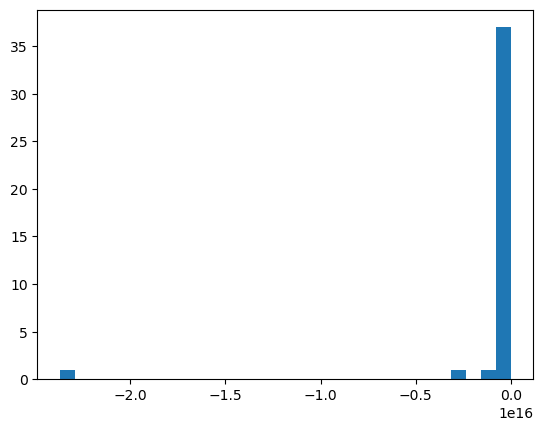

In [16]:
plt.hist(mm_wealth, bins=30)

In [17]:
print(np.sum([p.wealth for p in game.players]))
print(game.mm.wealth)
print(np.sum([p.position for p in game.players]))
print(game.mm.position)

10235.88548445364
-10135.91848231222
-10
9


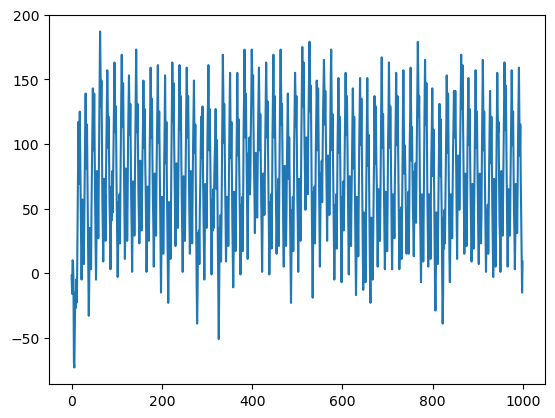

In [18]:
plt.plot(game.mm.position_per_round)

(array([ 1.,  4.,  2.,  3.,  0.,  0.,  3.,  7.,  5.,  6.,  2.,  9.,  4.,
         8.,  1.,  9.,  8., 10.,  2.,  3.,  5., 12.,  4.,  5., 10.,  9.,
         7.,  3.,  3.,  9., 10.,  4.,  4.,  7.,  3.,  1.,  1.,  6.,  4.,
         1.,  0.,  1.,  2.,  0.,  0.,  3.,  0.,  0.,  0.,  1.]),
 array([-668.  , -637.36, -606.72, -576.08, -545.44, -514.8 , -484.16,
        -453.52, -422.88, -392.24, -361.6 , -330.96, -300.32, -269.68,
        -239.04, -208.4 , -177.76, -147.12, -116.48,  -85.84,  -55.2 ,
         -24.56,    6.08,   36.72,   67.36,   98.  ,  128.64,  159.28,
         189.92,  220.56,  251.2 ,  281.84,  312.48,  343.12,  373.76,
         404.4 ,  435.04,  465.68,  496.32,  526.96,  557.6 ,  588.24,
         618.88,  649.52,  680.16,  710.8 ,  741.44,  772.08,  802.72,
         833.36,  864.  ]),
 <BarContainer object of 50 artists>)

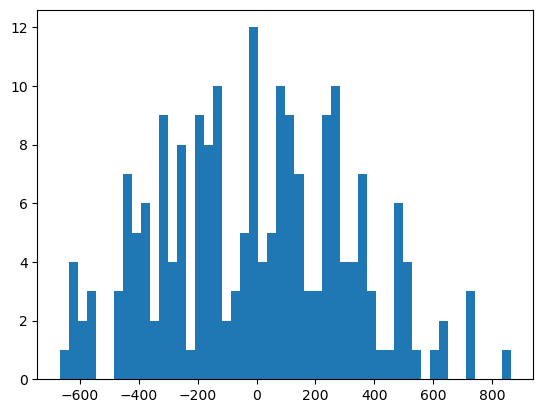

In [19]:
plt.hist([p.position for p in game.players], bins=50)

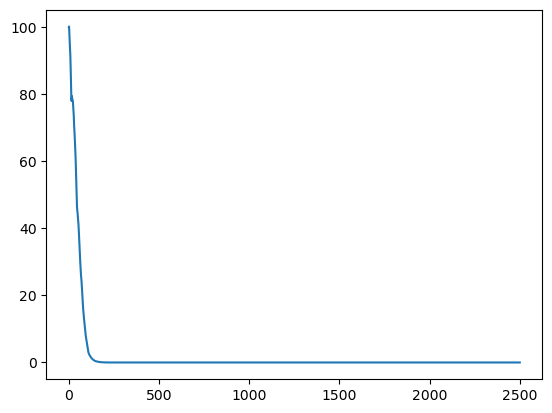

In [69]:
plt.plot(game.prices)

In [70]:
def build_price_series(A: np.ndarray, lam: float) -> np.ndarray:
    """Construct price series p given Δp(t+1)/p = lam*A(t) + ε_{t+1}. p[0]=100."""
    T = A.size
    r = A / lam
    p = np.zeros(T + 1)
    p[0] = 100
    p[1:] = p[0] * np.exp(np.cumsum(r))
    return p

In [71]:
A = np.array(game.actions)
lam = 30*N

p = build_price_series(A, lam)

array([[1.        , 0.99956817],
       [0.99956817, 1.        ]])

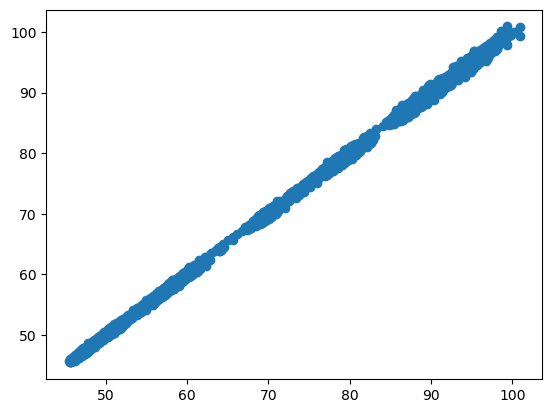

In [72]:
plt.scatter(p[1:], p[:-1])
np.corrcoef(p[1:], p[:-1])

In [21]:
payoff_scheme = [BinaryMGPayoff, ScaledMGPayoff]
[p() for p in payoff_scheme]

array([[1.        , 0.99992527],
       [0.99992527, 1.        ]])

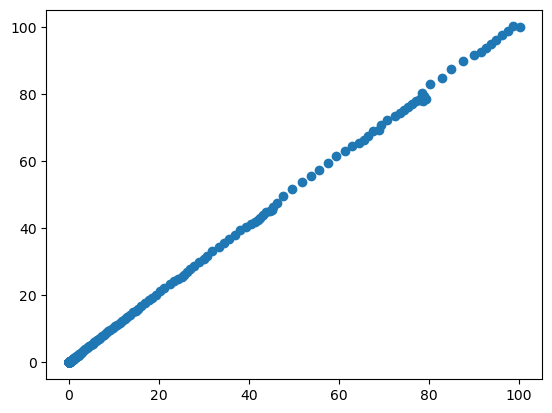

In [73]:
plt.scatter(game.prices[1:], game.prices[:-1])
np.corrcoef(game.prices[1:], game.prices[:-1])

In [78]:
def risk_from_wealth(wealth):    daily_return = [wealth[1:]-wealth[:-1]]
    avg_return = np.mean(daily_return)
    risk = np.var(daily_return)
    return avg_return, risk

In [ ]:
plt.suptitle(

In [79]:
a =  np.array([p.wealth_per_round for p in game.players])
print(np.shape(a))

(301, 2501)


In [80]:
m = np.array(game.mm.wealth_per_round)
print(np.shape(m))
ac = np.array(game.actions)
print(np.shape(ac))

(2500,)
(2500,)


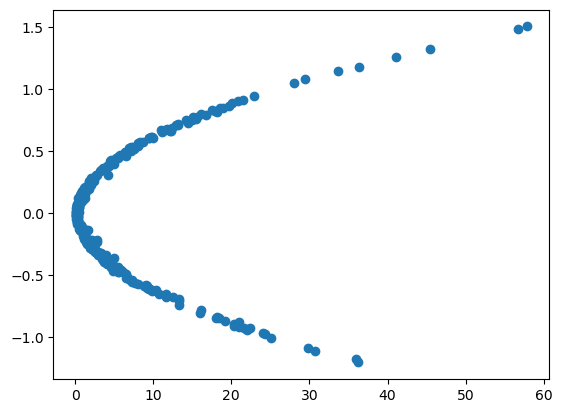

In [81]:
wealth = game.players[50].wealth_per_round

pairs = [risk_from_wealth(np.array(p.wealth_per_round)) for p in game.players]

avg_ret, risk = map(np.array, zip(*pairs))




plt.scatter(risk, avg_ret

(array([  0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   2.,   6.,   8.,
         24.,  17.,  32.,  69.,  95., 123., 172., 195., 265., 204., 207.,
        154., 140., 108.,  67.,  45.,  27.,  17.,  11.,   4.,   3.,   2.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([-200., -190., -180., -170., -160., -150., -140., -130., -120.,
        -110., -100.,  -90.,  -80.,  -70.,  -60.,  -50.,  -40.,  -30.,
         -20.,  -10.,    0.,   10.,   20.,   30.,   40.,   50.,   60.,
          70.,   80.,   90.,  100.,  110.,  120.,  130.,  140.,  150.,
         160.,  170.,  180.,  190.,  200.]),
 <BarContainer object of 40 artists>)

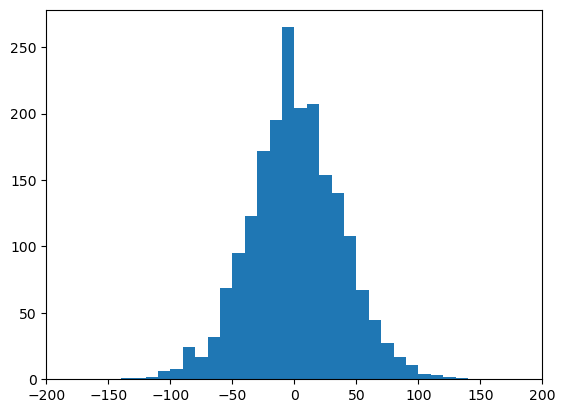

In [38]:
plt.xlim(-200,200)
plt.hist(game.actions, 40, (-200,200))

Text(-30, 60, 'Correlation wealth, points 0.587')

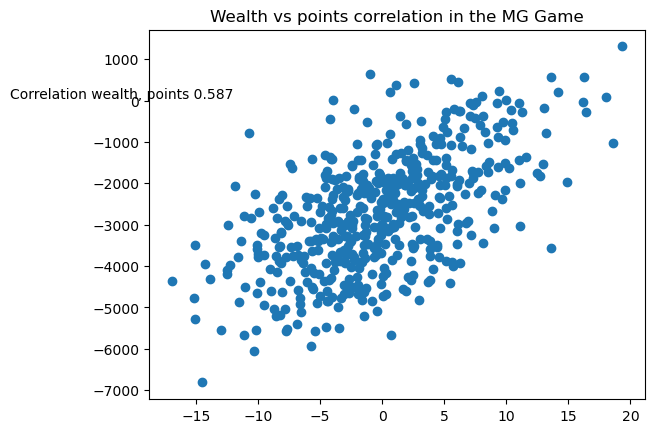

In [39]:
corr=np.corrcoef([p.wealth for p in game.players], [p.points for p in game.players])
plt.scatter([p.wealth for p in game.players], [p.points for p in game.players])
plt.title("Wealth vs points correlation in the MG Game")
plt.text(-30,60, f"Correlation wealth, points {corr[0,1]:.3f}")


In [40]:
corr

array([[1.        , 0.58711234],
       [0.58711234, 1.        ]])

In [41]:
avg_wins=[np.mean(p.wins_per_round) for p in game.players]
avg_wins

[0.5087543771885943,
 0.4977488744372186,
 0.4912456228114057,
 0.4867433716858429,
 0.48024012006003003,
 0.47073536768384194,
 0.4822411205602801,
 0.48574287143571787,
 0.49024512256128067,
 0.48574287143571787,
 0.4847423711855928,
 0.5102551275637819,
 0.5022511255627814,
 0.4822411205602801,
 0.4842421210605303,
 0.4752376188094047,
 0.49974987493746875,
 0.4912456228114057,
 0.4882441220610305,
 0.4687343671835918,
 0.4737368684342171,
 0.47073536768384194,
 0.4832416208104052,
 0.4882441220610305,
 0.5042521260630315,
 0.4762381190595298,
 0.4687343671835918,
 0.4817408704352176,
 0.46923461730865434,
 0.4942471235617809,
 0.49024512256128067,
 0.4827413706853427,
 0.49024512256128067,
 0.49074537268634316,
 0.4817408704352176,
 0.48924462231115556,
 0.4702351175587794,
 0.4777388694347174,
 0.4792396198099049,
 0.4792396198099049,
 0.5017508754377189,
 0.5062531265632816,
 0.4762381190595298,
 0.4652326163081541,
 0.4812406203101551,
 0.47273636818409204,
 0.48874437218609307,

In [42]:
top_indices=np.argsort(avg_wins)[-3:]

In [43]:
top_indices

array([106, 221, 481])

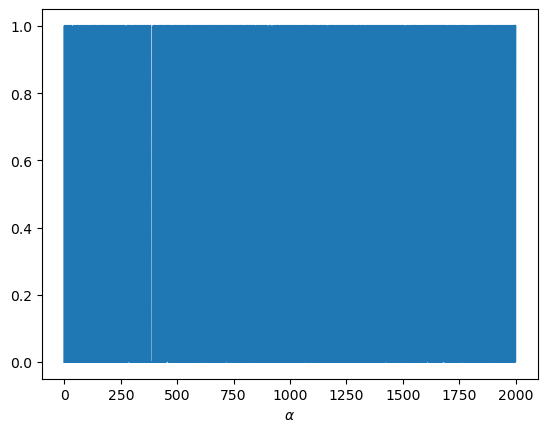

In [44]:
plt.xlabel(r"$\alpha$")
plt.plot(game.players[132].wins_per_round)

In [45]:
interval = 1000
total_rounds=len(game.players[0].wins_per_round)
points = int(total_rounds / interval)
wins = [np.mean(game.players[132].wins_per_round[p * interval:(p+1) * (interval)]) for p in range(points)]

In [46]:
wins

[0.489]

In [47]:
import pandas as pd

df = pd.read_csv("simulation_runs/20250822_154358_HeteroMemory_BinaryMGPayoff/per_player_metrics.csv")
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1575 entries, 0 to 1574
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   memory             1575 non-null   int64  
 1   success_rate       1575 non-null   float64
 2   average_score      1575 non-null   float64
 3   strategy_switches  1575 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 49.3 KB
None
   memory  success_rate  average_score  strategy_switches
0       2         0.362         -0.276                432
1       2         0.401         -0.198                500
2       2         0.371         -0.258                395
3       2         0.387         -0.226                443
4       2         0.379         -0.242                401


In [48]:
df


,memory,success_rate,average_score,strategy_switches
0,2,0.362,-0.276,432
1,2,0.401,-0.198,500
2,2,0.371,-0.258,395
3,2,0.387,-0.226,443
4,2,0.379,-0.242,401
...,...,...,...,...
1570,10,0.481,-0.038,85
1571,10,0.463,-0.074,119
1572,10,0.506,0.012,51
1573,10,0.483,-0.034,81


In [49]:
def moving_average(arr, interval):
    ret = np.cumsum(arr, dtype=float)
    ret[interval:] = ret[interval:]-ret[:-interval]
    return ret[interval-1:] / interval

In [50]:
arr = np.arange(1000)

/var/folders/cf/mc_3sfbd1k13jd19ts73bs400000gn/T/ipykernel_33081/3587958643.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


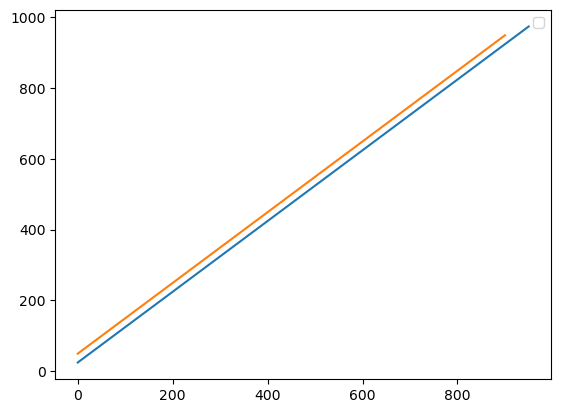

In [45]:
plt.plot(moving_average(arr, 50))
plt.plot(moving_average(arr, 100))
plt.legend()